## The Concept of KNN

In this code, Implementing the concept of KNN, ie, K-Nearest Neighbors. Accoring to this concept, the value for which we need to find the accuracy, my model will look for the nearest values of that particular point and then by the historical data it will predict the value. 
The concept is that it does not train any data, we just give the dataset into the model and then automatically by looking the historical data it gives the prediction. It is the background concept of the KNN.

In [82]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-06-10 22:39:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  36.18K  88.6KB/s    in 0.4s    

2020-06-10 22:39:57 (88.6 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



## About the Dataset

The dataset in this model is a dataset of a telecom company. The need of the prediction is that, we need to predict the coustomer category, weather the coustomer is of 1- Basic Service, 2- E-Service, 3- Plus Service, 4-Total Service which we can see in column "custcat".

In [6]:
dataset = pd.read_csv("teleCust1000t.csv")

In [7]:
dataset

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [10]:
dataset.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [12]:
# To see the count of category of each type
dataset["custcat"].value_counts() 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [13]:
dataset.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [24]:
X = dataset[["region","tenure","age","marital","address","income","ed","employ","retire","gender","reside"]]
y = dataset["custcat"]

In [29]:
newx = X.values
type(newx)
newy = y.values
type(newy)
X = newx
y = newy

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

While Scaling the dataset, we first use fit_transform, it will automatically choose an appropriate range for scaling the data, and after once the range is selected we have to to use only transform coz it has already selected the range for dataset and we need to scale the data in same range

In [31]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(20)

In [70]:
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [71]:
y_pred = model.predict(X_test_scaled)

In [72]:
y_pred

array([3, 4, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3, 4, 3, 1, 1, 4, 4, 1, 4, 1, 3,
       3, 3, 3, 3, 2, 1, 4, 4, 3, 1, 3, 1, 2, 1, 1, 1, 3, 4, 1, 3, 3, 3,
       3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 3, 4, 3, 4,
       3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 2, 3,
       4, 2, 4, 4, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 1, 2, 2, 4, 1, 3, 1, 3,
       2, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 2, 3, 3, 4, 2, 3, 2, 1, 2, 1, 3,
       1, 1, 3, 1, 3, 2, 1, 1, 4, 1, 4, 4, 1, 3, 2, 3, 4, 1, 1, 4, 4, 3,
       3, 3, 2, 3, 3, 1, 4, 3, 1, 1, 1, 1, 4, 3, 3, 4, 1, 3, 4, 3, 3, 4,
       1, 1, 1, 3, 3, 3, 4, 2, 1, 4, 4, 2, 2, 3, 1, 1, 1, 3, 4, 1, 1, 3,
       3, 3, 3, 4, 3, 3, 4, 1, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3,
       4, 2, 1, 1, 1, 3, 2, 3, 1, 4, 2, 2, 3, 1, 4, 2, 3, 1, 1, 1, 1, 2,
       1, 4, 1, 3, 1, 3, 3, 1, 3, 3, 4, 1, 3, 4, 1, 2, 3, 3, 3, 2, 3, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 4, 4, 3, 3, 1, 3, 1, 4, 1, 2, 2, 1, 4, 2,
       3, 3, 1, 1, 2, 3, 1, 3, 1, 2, 4, 4, 4, 1, 2,

In [73]:
y_test

array([2, 1, 2, 3, 1, 4, 4, 2, 1, 1, 1, 3, 2, 3, 1, 4, 4, 2, 4, 1, 1, 2,
       3, 1, 1, 2, 3, 4, 1, 2, 2, 4, 1, 3, 4, 1, 1, 1, 4, 2, 4, 3, 2, 3,
       2, 3, 3, 2, 4, 3, 2, 2, 1, 4, 1, 2, 3, 1, 4, 1, 3, 1, 4, 3, 2, 2,
       1, 1, 1, 1, 4, 1, 3, 4, 2, 2, 3, 3, 1, 3, 2, 3, 2, 3, 4, 1, 3, 4,
       3, 3, 3, 1, 3, 4, 3, 1, 2, 4, 4, 1, 4, 3, 1, 2, 4, 1, 1, 3, 1, 3,
       4, 4, 4, 3, 2, 1, 2, 1, 3, 4, 3, 2, 4, 4, 4, 4, 1, 2, 4, 3, 1, 4,
       1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 4, 4, 3, 4, 1, 4, 3, 1, 2, 1, 2,
       2, 3, 1, 3, 3, 3, 4, 3, 1, 3, 4, 2, 4, 2, 4, 1, 3, 1, 2, 3, 1, 2,
       4, 4, 3, 3, 3, 2, 2, 3, 1, 3, 3, 1, 4, 1, 4, 2, 3, 4, 2, 1, 1, 3,
       3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 1, 1, 3, 3, 3, 3, 1, 4, 2, 2, 3,
       4, 2, 2, 3, 2, 3, 3, 4, 1, 4, 3, 4, 1, 1, 2, 4, 3, 1, 2, 4, 1, 4,
       4, 4, 2, 2, 1, 1, 2, 4, 4, 2, 2, 2, 3, 4, 3, 2, 2, 3, 1, 4, 2, 3,
       2, 3, 4, 1, 1, 2, 1, 3, 4, 1, 1, 2, 1, 3, 1, 4, 1, 4, 4, 4, 1, 3,
       3, 3, 1, 1, 3, 2, 2, 3, 4, 2, 1, 3, 4, 3, 3,

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47,  8, 25, 11],
       [19,  9, 28, 19],
       [23, 11, 46,  8],
       [29, 14, 18, 15]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.35454545454545455

It is very hectic to find the accuracy of one by one so we can use loop to implement this and can find the accuracy of all the points which we want to find of.

In [84]:
accuracy = []
for i in range(1,500):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test,y_pred))
    

In [85]:
accuracy

[0.28484848484848485,
 0.29393939393939394,
 0.30606060606060603,
 0.3393939393939394,
 0.31212121212121213,
 0.3424242424242424,
 0.3515151515151515,
 0.3393939393939394,
 0.3515151515151515,
 0.3212121212121212,
 0.3424242424242424,
 0.37272727272727274,
 0.3787878787878788,
 0.3939393939393939,
 0.3878787878787879,
 0.39090909090909093,
 0.37575757575757573,
 0.36363636363636365,
 0.3606060606060606,
 0.35454545454545455,
 0.3515151515151515,
 0.3393939393939394,
 0.3484848484848485,
 0.35454545454545455,
 0.34545454545454546,
 0.33636363636363636,
 0.35454545454545455,
 0.3606060606060606,
 0.3393939393939394,
 0.33636363636363636,
 0.3303030303030303,
 0.3484848484848485,
 0.3424242424242424,
 0.3393939393939394,
 0.3484848484848485,
 0.3515151515151515,
 0.34545454545454546,
 0.3303030303030303,
 0.3515151515151515,
 0.3424242424242424,
 0.33636363636363636,
 0.3424242424242424,
 0.34545454545454546,
 0.3393939393939394,
 0.3393939393939394,
 0.34545454545454546,
 0.3424242424242

Text(0, 0.5, 'Accuracy')

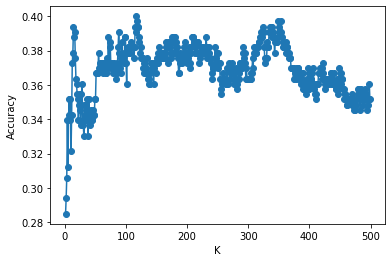

In [86]:
plt.plot(range(1,500), error_rate, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")